# Task 4: Temporal change in unit water footprint (uWF)

We create a heatmap to visualize the temporal change in uWF per country within 15 years (2001-2016)

In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/code/Techlab/virtualwater/"
fil =  "New_1960-2016.csv" #"watertofood_data_21crops_11countries_1960-2016.csv" 
df = pd.read_csv(path+fil, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
df.head(25)

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,67.596703,67.490303,67.621696,...,155.539001,173.072998,176.309998,145.723999,160.794998,302.752991,177.143005,157.955994,132.710007,251.289993
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,1601.750000,1525.469971,1690.540039,...,1422.300049,1414.449951,1329.170044,1745.650024,1409.689941,1252.089966,1606.729980,1680.609985,1756.510010,2152.719971
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,148.216995,146.811996,135.082001,...,95.588402,88.136299,87.707802,90.581497,75.778297,80.972298,84.542801,77.037201,116.822998,88.053802
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,562.728027,415.609985,617.362000,...,589.810974,746.117981,660.210022,685.169006,689.297974,697.112000,694.752014,692.406006,690.057007,687.744019
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,209.169998,211.339005,185.434998,...,47.731300,41.110500,39.060101,46.044498,43.460999,42.093102,40.094002,40.202702,46.184299,49.357101
5,Austria,11,AT,Cucumbers and gherkins,397,Vegetables,m3/ton,309.141998,259.329987,223.511002,...,44.000900,41.792099,43.147800,42.233501,36.699402,36.932800,36.127899,36.631199,38.718102,33.099998
6,Austria,11,AT,Grapes,560,Fruits,m3/ton,865.823975,1147.729980,703.020020,...,518.797974,470.050995,591.460999,775.156006,480.401001,624.341980,567.318970,691.158020,595.270996,734.364990
7,Austria,11,AT,Lettuce and chicory,372,Vegetables,m3/ton,132.837997,148.423996,128.235001,...,83.790001,87.779503,93.297699,99.085701,104.741997,97.226501,104.888000,115.374001,123.419998,109.710999
8,Austria,11,AT,Maize,56,Cereals,m3/ton,1021.640015,1107.260010,1010.440002,...,382.441986,348.497009,364.200989,405.570007,349.042999,368.515991,485.881989,365.476990,454.450989,353.316986
9,Austria,11,AT,Mushrooms and truffles,449,Vegetables,m3/ton,137.214005,135.225006,138.951004,...,105.052002,104.383003,103.722000,103.070000,102.681000,102.156998,101.462997,100.053001,102.584999,96.666496


In [73]:
# pivot df and create new df for difference between years 2016 and 2001 (use running mean of 3 years)
df2000 = pd.pivot_table(df, values=df.iloc[:,47:50],aggfunc=np.mean, index=["Country Name"], columns=["Item Name"])
df2016 = pd.pivot_table(df, values=df.iloc[:,60:63],aggfunc=np.mean, index=["Country Name"], columns=["Item Name"])
dfally = pd.pivot_table(df, values=df.iloc[:,7:63],aggfunc=np.mean, index=["Country Name"], columns=["Item Name"])

# df for difference in years
df_diff = pd.DataFrame(df2016.iloc[:,::15].mean(axis=1) - df2000.iloc[:,::15].mean(axis=1))
df_diff.rename(columns={0:"Apples"}, inplace=True)
df_diff15y = df_diff.copy()

# df for mean over all years
df_tmean_init = pd.DataFrame( dfally.iloc[:,::15].mean(axis=1))
df_tmean_init.rename(columns={0:"Apples"}, inplace=True)
df_tmean = df_tmean_init.copy()

# df for std over all years
df_tstd_init = pd.DataFrame( dfally.iloc[:,::15].std(axis=1))
df_tstd_init.rename(columns={0:"Apples"}, inplace=True)
df_tstd = df_tstd_init.copy()

i=1 # for loop over items to get diff of 3-yr means around 2000 and 2015
for item in df["Item Name"].unique()[1:]:
    df_tmp = pd.Series(df2016.iloc[:,i::15].mean(axis=1) - df2000.iloc[:,i::15].mean(axis=1), 
                       index = df2000.index)
    df_tmp2 = pd.Series( dfally.iloc[:,i::15].mean(axis=1), 
                        index = dfally.index )
    df_tmp3 = pd.Series( dfally.iloc[:,i::15].std(axis=1), 
                        index = dfally.index )
    #display(item, df_tmp)
    df_diff15y[item] = df_tmp
    df_tmean[item] = df_tmp2
    df_tstd[item] = df_tmp3
    
    i+=1
    del df_tmp, df_tmp2, df_tmp3
    
df_diff15y.dropna(axis=0,how="all",inplace=True) # drop countries for which all diffs are NaN
df_diff15y

display(df_tmean)
display(df_tstd)

#pd.DataFrame( dfally.iloc[12,::15])

### IMPORTANT: Belgium and Serbia start only in 2000 and 2006 (other years: NaN) !!! ###

,Apples,Asparagus,Carrots and turnips,Cherries,"Chillies and peppers, green",Cucumbers and gherkins,Grapes,Lettuce and chicory,Maize,Mushrooms and truffles,Peaches and nectarines,Pears,Potatoes,"Pumpkins, squash and gourds",Tomatoes
Country Name,,,,,,,,,,,,,,,
Austria,141.707267,1591.147147,125.975348,930.872178,170.746334,133.148490,624.777643,111.994602,554.700714,126.972188,311.796192,110.994753,148.028731,77.943959,64.047546
Belgium,144.156828,665.473527,56.360089,1048.008006,63.231900,19.910618,246.541587,57.865889,316.008706,62.050472,NaN,176.132531,79.517553,68.820188,9.000083
France,206.960232,2026.862135,120.783325,1160.141429,195.861590,89.445866,523.776571,135.335767,756.453696,225.710322,447.561714,358.802500,130.976898,83.663484,85.068036
Germany,166.683934,1780.864647,104.827589,1689.517054,7.770923,130.414839,301.773375,122.547165,618.127390,126.972188,877.914320,246.779590,129.739407,50.366259,81.950607
Greece,512.509391,3288.543546,209.879697,1508.330893,68.159687,80.652573,462.905391,170.465839,1144.696870,103.792267,782.261666,571.097854,233.487393,130.439043,88.869225
Hungary,429.764946,3844.231650,101.835185,1197.308737,270.194473,303.877354,886.900807,298.121767,820.847120,200.177553,789.105373,560.602286,239.086144,171.148158,166.997122
Italy,247.372820,1286.450899,122.328364,1573.524980,179.870500,173.781874,462.331661,181.726518,742.005949,154.875258,428.608713,352.689250,233.885929,122.715897,129.358005
Morocco,1176.755796,2466.568054,546.472392,2039.181119,137.346710,299.578999,1534.489520,97.993375,7438.533552,216.827238,1149.208770,956.922788,221.765725,104.107882,143.453636
Netherlands,136.725697,1023.645908,66.279159,5303.897639,13.446206,13.399002,1706.520033,87.717223,520.292375,151.746903,638.341270,205.497786,89.884766,42.933346,17.459676


,Apples,Asparagus,Carrots and turnips,Cherries,"Chillies and peppers, green",Cucumbers and gherkins,Grapes,Lettuce and chicory,Maize,Mushrooms and truffles,Peaches and nectarines,Pears,Potatoes,"Pumpkins, squash and gourds",Tomatoes
Country Name,,,,,,,,,,,,,,,
Austria,72.582717,219.868585,28.874494,469.649722,82.171747,77.504765,177.068068,17.614259,190.530460,39.907778,158.585087,106.155322,24.030577,15.889888,37.977843
Belgium,23.302182,113.864336,7.927414,435.166201,14.808405,5.361350,24.905007,14.266746,28.183827,40.300465,NaN,54.478135,7.046402,39.717869,2.668139
France,47.493128,326.591633,24.445572,340.924952,84.234338,60.209572,76.049379,26.700324,341.407960,150.422016,254.766374,101.776209,45.054068,16.318762,50.935188
Germany,62.095022,489.717055,27.945078,1171.693033,3.743396,93.902346,72.900127,23.049834,228.283034,39.907778,544.293490,73.773198,39.155472,8.660791,54.248197
Greece,224.621922,2362.670371,52.411596,238.352670,37.122153,61.976147,79.080861,27.222113,1035.216603,57.822488,676.202608,161.987877,85.717752,294.408575,45.761410
Hungary,144.704266,4006.780053,32.107017,607.672962,123.742713,203.623978,359.130237,169.304029,290.222826,80.659821,361.946150,306.563147,97.715622,37.363533,81.006197
Italy,55.548080,194.261230,23.188450,331.315259,18.313382,41.900319,99.254871,11.128843,304.688119,109.219614,72.433467,59.978711,76.110618,17.941708,42.349348
Morocco,427.764784,979.319425,302.128951,1227.058151,47.825006,180.006350,453.068740,2.740590,5281.278039,144.157893,414.084107,238.978767,83.162743,23.317478,73.393209
Netherlands,49.780546,462.299587,19.026716,5334.125409,4.382467,11.675470,3840.055388,18.983946,249.116021,47.853863,328.891338,65.429466,13.802935,12.607910,12.207373


# Statistics
## 1. Mean unit water footprints

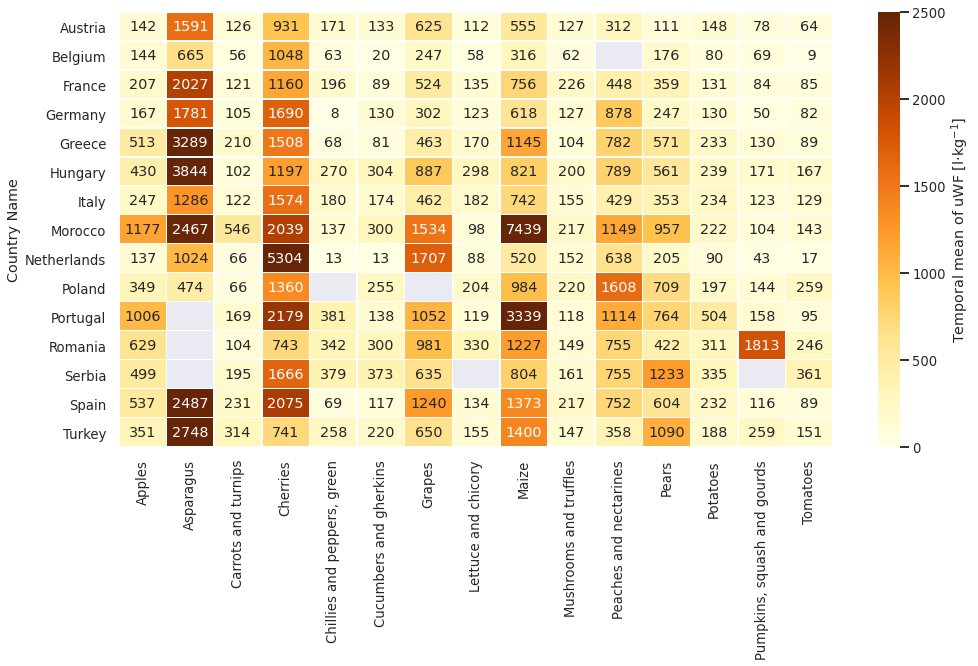

In [58]:
# Plot heatmap for average uWF over all years WITHOUT standardization per item
f4, ax4 = plt.subplots(figsize=(16, 8))  # initialize plot
c4 = sns.heatmap(df_tmean, 
                 annot=True, fmt="2.0f", linewidths=.5,
            ax=ax4, cbar=True, cmap='YlOrBr', vmin=0, vmax=2500,
            cbar_kws={"label":"Temporal mean of uWF [l$\cdot$kg$^{-1}$]"});

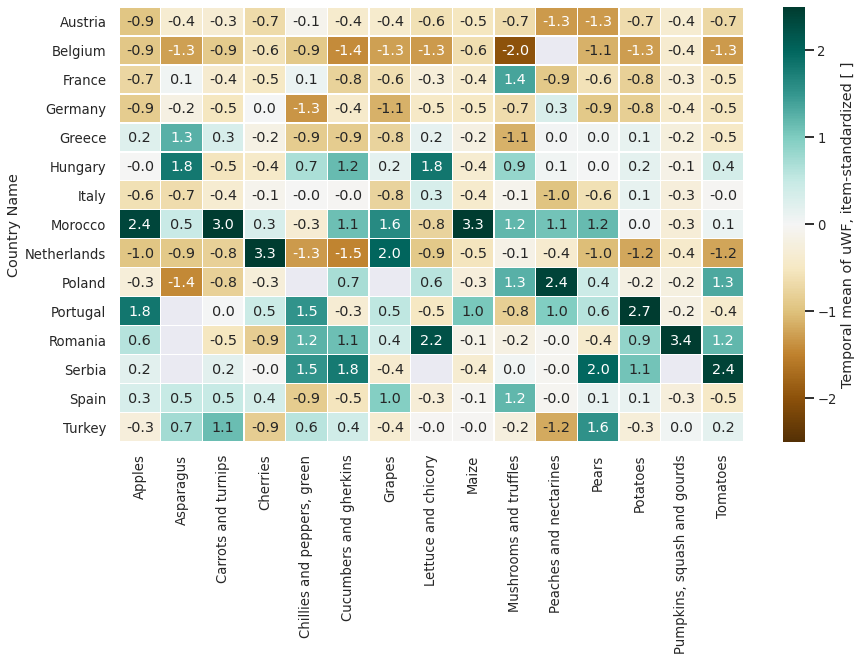

In [67]:
# Plot heatmap for average uWF over all years WITH item standardization (x-x_mean)/x_std
f4, ax4 = plt.subplots(figsize=(14, 8))  # initialize plot
c4 = sns.heatmap((df_tmean-df_tmean.mean(axis=0))/df_tmean.std(axis=0), 
                 annot=True, fmt="2.1f", linewidths=.5, 
            ax=ax4, center=0, cbar=True, cmap='BrBG', vmin=-2.5, vmax=2.5,
            cbar_kws={"label":"Temporal mean of uWF, item-standardized [ ]"});


## 2. Standard deviation of unit water footprint over whole time period

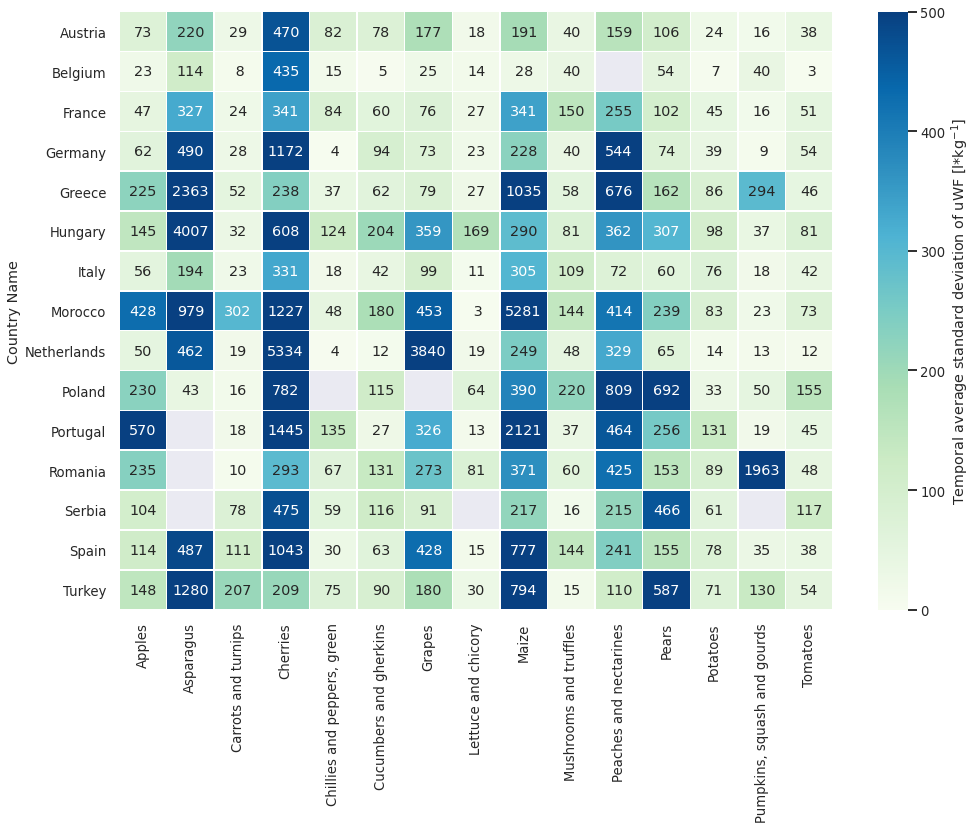

In [38]:
# Plot heatmap for correlation of average uWF over all years
f3, ax3 = plt.subplots(figsize=(16, 11))  # initialize plot
c3 = sns.heatmap(df_tstd, annot=True, fmt="2.0f", linewidths=.5, 
            ax=ax3, center=250, cbar=True, cmap='GnBu', vmin=0, vmax=500,
            cbar_kws={"label":"Temporal average standard deviation of uWF [l$*$kg$^{-1}$]"});


## 3. Difference of uWF between 2001 and 2016 (using 3yr-averages) 

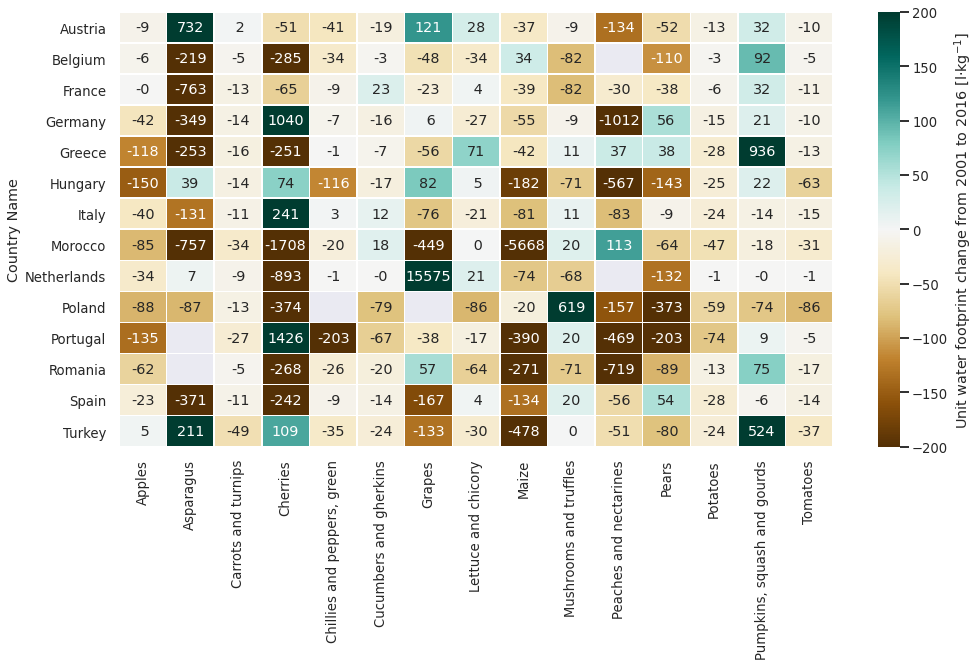

In [59]:
# Plot heatmap for diffs per country and item
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)

f, ax = plt.subplots(figsize=(16, 8))  # initialize plot

sns.heatmap(df_diff15y, annot=True, fmt="2.0f", linewidths=.5, 
            ax=ax, center=0, cbar=True, cmap='BrBG', vmin=-200, vmax=200,
            cbar_kws={"label":"Unit water footprint change from 2001 to 2016 [l$\cdot$kg$^{-1}$]"});

# blue colors (positive values) correspond to increase in uWF; brownish colors to decrease

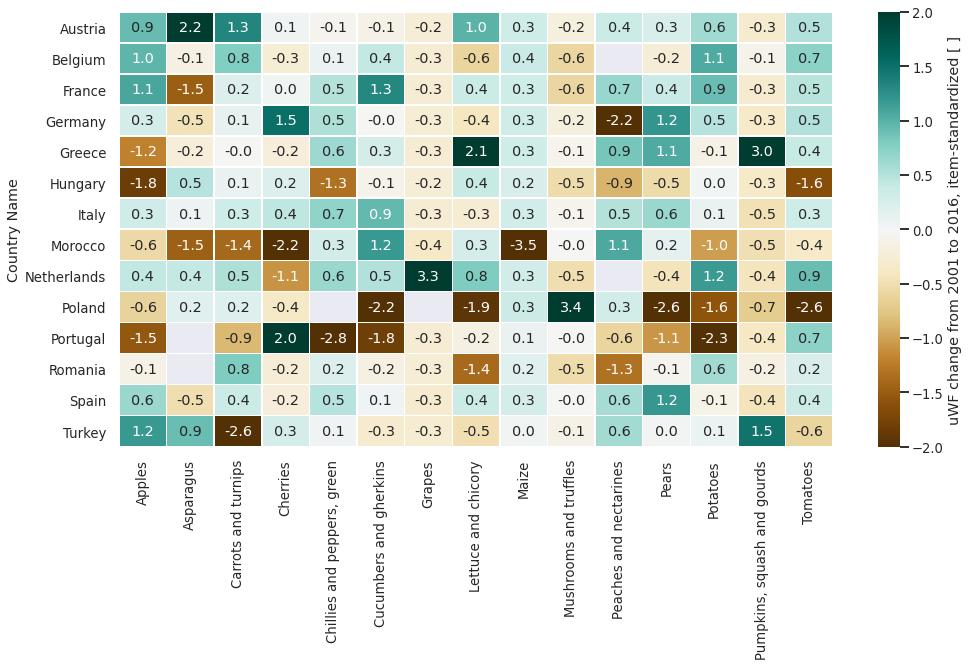

In [63]:
# Plot heatmap for diffs per country and item WITH standardization per item
f, ax = plt.subplots(figsize=(16, 8))  # initialize plot

sns.heatmap((df_diff15y-df_diff15y.mean(axis=0))/df_diff15y.std(axis=0), annot=True, fmt="2.1f", linewidths=.5, 
            ax=ax, center=0, cbar=True, cmap='BrBG', vmin=-2, vmax=2,
            cbar_kws={"label":"uWF change from 2001 to 2016, item-standardized [ ]"});


## 4. Correlation of mean uWF for each item 

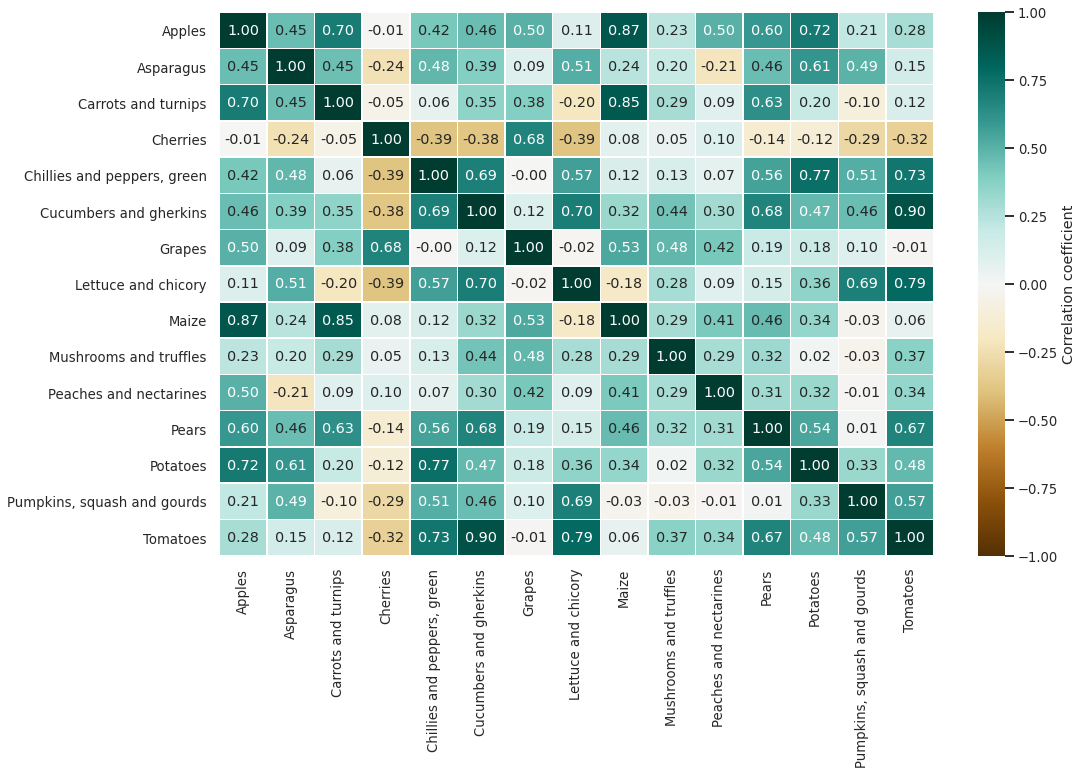

In [61]:
# Plot heatmap for correlation of average uWF over all years
f2, ax2 = plt.subplots(figsize=(16, 10))  # initialize plot
co = sns.heatmap(df_tmean.corr(), annot=True, fmt="2.2f", linewidths=.5, 
            ax=ax2, center=0, cbar=True, cmap='BrBG', vmin=-1, vmax=1,
            cbar_kws={"label":"Correlation coefficient"});


In [6]:
apl = apl.xs("Apples", axis=1, level=1)
apl.columns.names = ["Year"]
apl=apl.T
apl

NameError: name 'apl' is not defined

In [ ]:
apl_15y_trend = pd.DataFrame(apl.loc[['2014','2015','2016'],:].mean(axis=0) - 
                             apl.loc[['2002','2003','2004'],:].mean(axis=0))
#apl_15y_trend.columns.name = "Apples"
apl_15y_trend

In [ ]:
apl_15y_trend.columns.name = "Crop Name"
apl_15y_trend
#df_15ydiff = pd.DataFrame(apl_15y_trend, index=apl_15y_trend.index)
#df_15ydiff

In [ ]:
#fig,ax = plt.subplots(figsize=(8, 18), sharex= True) #
plt.figure(figsize=(16, 30))
j=1
for i in apl.columns:
    print(j)
    plt.subplot(15,1,j)
    plt.axis([0, 2017-1960, 1, 2500])
    plt.legend(i)
    plt.yscale('log')
    plt.grid(True)
    j+=1
    plt.plot(apl.index,apl[i], "bo", markersize=6, label=i);
    plt.annotate(i, xy=(2017-1955, 2000), xytext=(2017-1955, 2000))
#ax.plot(x, x**3, label='cubic')  # ... and some more.
#ax.set_xlabel('Year')  # Add an x-label to the axes.
#ax.set_ylabel('uWF [$l\cdot kg^{-1}$]')  # Add a y-label to the axes.
#ax.set_title("Water Footprint over time");
#plt.legend()

In [ ]:
apl_y = apl.copy()
apl_y["Year"] = apl.index
apl_y["Year"] = pd.to_numeric(apl_y["Year"])
apl_y["Year"][0]

In [ ]:
#g = sns.PairGrid(apl, height=12, aspect=0.9) 
#g.map(sns.regplot, color=".2", order=1);
#g.set(xlim=(1960, 2020), xticks=[1960,1980,2000,2020]);
#apl.index.name
f, ax = plt.subplots(figsize=(15, 10))
#g = sns.PairGrid(apl_y, x_vars=["Year"], y_vars=list(apl_y.columns[:-1]), height=2, aspect=3.9) #df4.columns[1:]
#g.map(sns.regplot, color=".2", order=1)
#
for i in apl_y.columns[:-1]:
    g = sns.regplot(x="Year", y=i, data=apl_y, ax=ax); #, hue="smoker", col="time"
g.set(xlim=(1960, 2020), xticks=[1960,1980,2000,2020]);
